In [1]:
%pip install prometheus-api-client pandas matplotlib statsmodels scikit-learn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler


In [3]:
# Carregar os dados
metric_df = pd.read_pickle("../data/ts.pkl")

In [5]:
# Calculate the number of days of metrics collected
num_days = (metric_df.index.max() - metric_df.index.min()).days
print(f"Number of days of metrics collected: {num_days} days")

Number of days of metrics collected: 6 days


In [6]:
# Resample para intervalos de 30 minutos
ts = metric_df["value"].astype(float).resample("30min").mean()

# Dividir em treino e teste
train = ts[:"2021-02-07"]
test = ts["2021-02-08":]

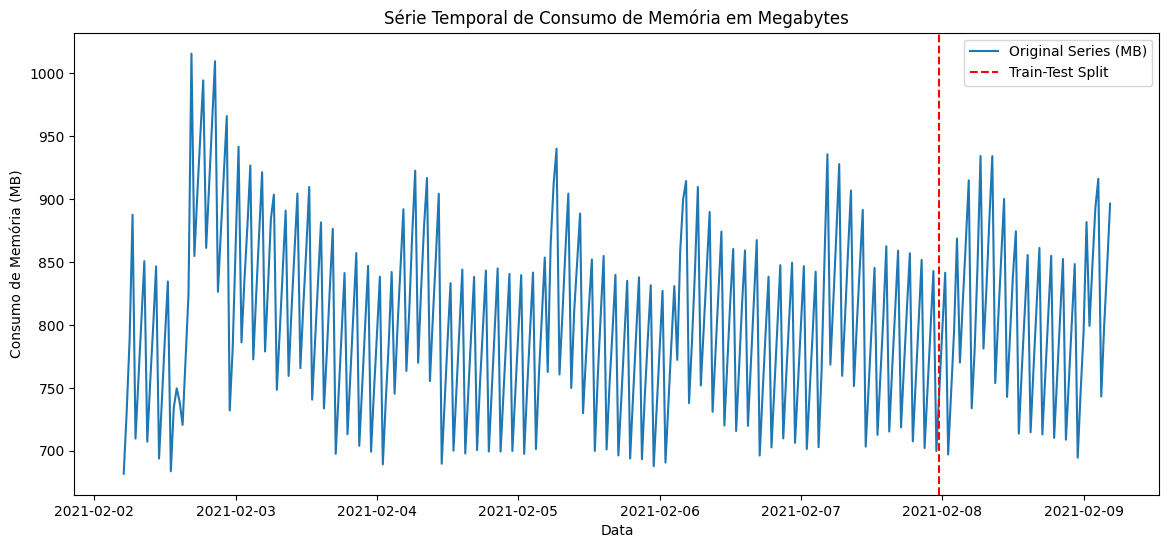

In [7]:
# Converter a série para Megabytes
ts_mb = ts / (1024 ** 2)
train_mb = train / (1024 ** 2)
test_mb = test / (1024 ** 2)

# Visualização inicial da série temporal em MB
plt.figure(figsize=(14, 6))
plt.plot(ts_mb, label="Original Series (MB)")
plt.axvline(x=train.index[-1], color="red", linestyle="--", label="Train-Test Split")
plt.title("Série Temporal de Consumo de Memória em Megabytes")
plt.xlabel("Data")
plt.ylabel("Consumo de Memória (MB)")
plt.legend()
plt.show()


In [8]:
# Estatísticas descritivas
descriptive_stats = ts_mb.describe()
print("Estatísticas Descritivas do Consumo de Memória (MB):")
print(descriptive_stats)


Estatísticas Descritivas do Consumo de Memória (MB):
count     336.000000
mean      802.250563
std        68.329882
min       681.835221
25%       748.751047
50%       798.248220
75%       849.814242
max      1015.616298
Name: value, dtype: float64


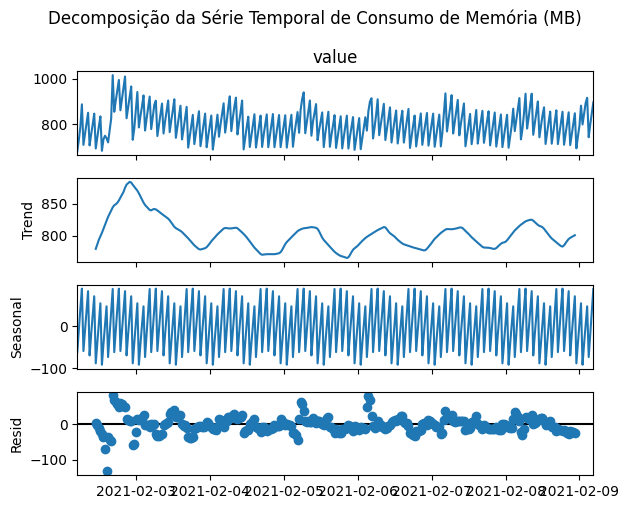

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposição da série temporal
decomposition = seasonal_decompose(ts_mb, model='additive', period=24)  # Ajuste o período conforme necessário
decomposition.plot()
plt.suptitle("Decomposição da Série Temporal de Consumo de Memória (MB)", y=1.05)
plt.show()


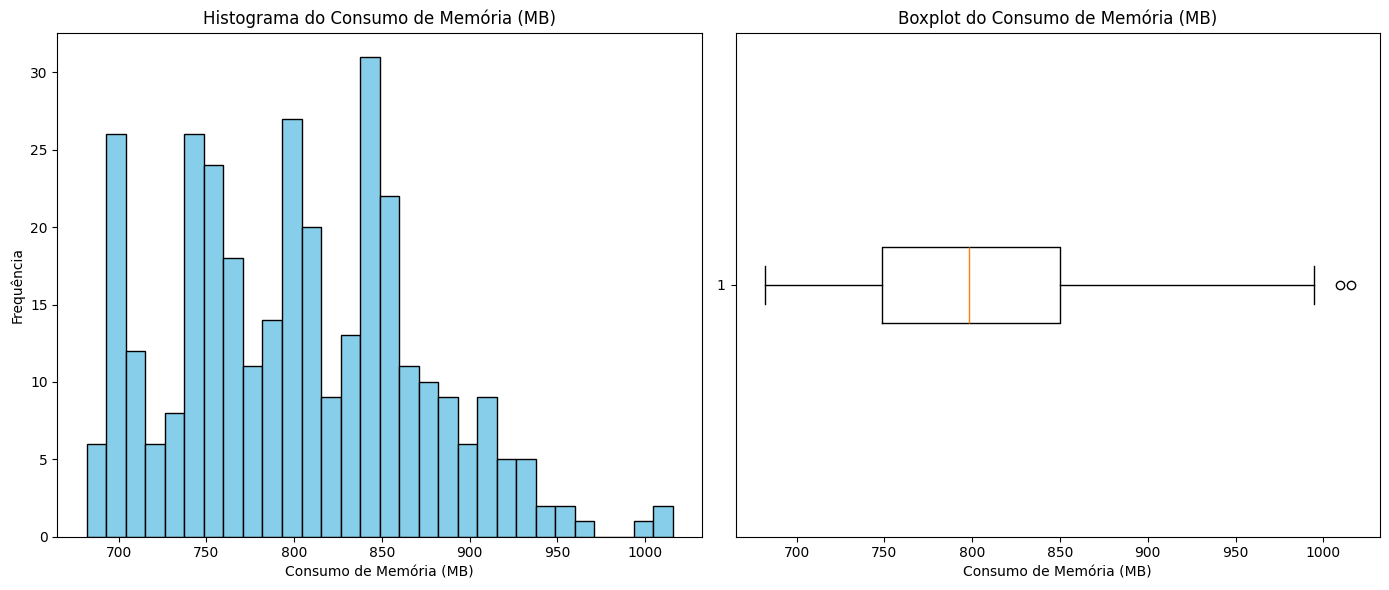

In [10]:
# Análise da distribuição dos valores
plt.figure(figsize=(14, 6))

# Histograma
plt.subplot(1, 2, 1)
plt.hist(ts_mb, bins=30, color='skyblue', edgecolor='black')
plt.title("Histograma do Consumo de Memória (MB)")
plt.xlabel("Consumo de Memória (MB)")
plt.ylabel("Frequência")

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(ts_mb, vert=False)
plt.title("Boxplot do Consumo de Memória (MB)")
plt.xlabel("Consumo de Memória (MB)")

plt.tight_layout()
plt.show()


<Figure size 1000x500 with 0 Axes>

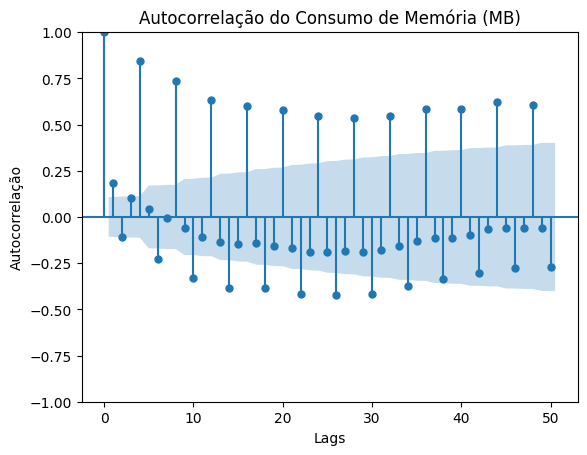

In [11]:
from statsmodels.graphics.tsaplots import plot_acf

# Autocorrelação
plt.figure(figsize=(10, 5))
plot_acf(ts_mb, lags=50)
plt.title("Autocorrelação do Consumo de Memória (MB)")
plt.xlabel("Lags")
plt.ylabel("Autocorrelação")
plt.show()
